## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [26]:
# @SHOW
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

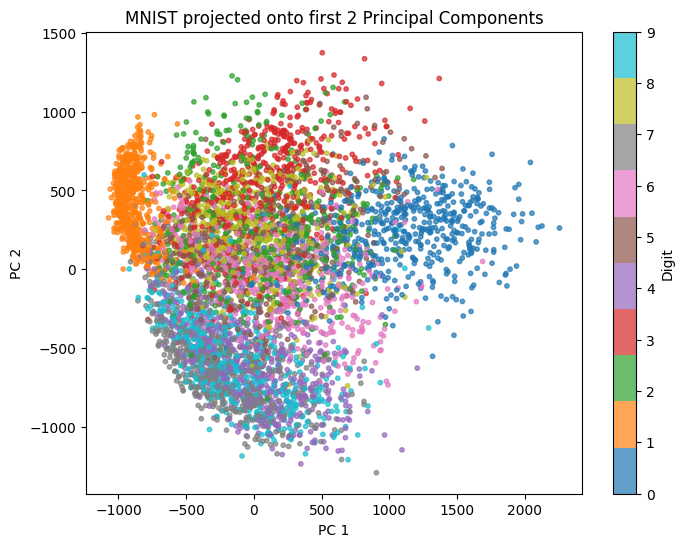

In [27]:
pca_2d = PCA(n_components=2, random_state=42)
X_train_2d = pca_2d.fit_transform(X_mnist_train)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
                      c=y_mnist_train, cmap="tab10", s=10, alpha=0.7)
plt.colorbar(scatter, label="Digit")
plt.title("MNIST projected onto first 2 Principal Components")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()



#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

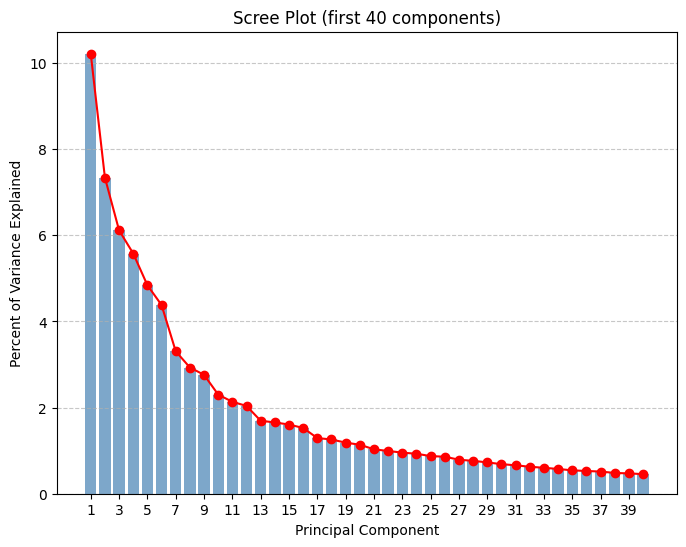

In [28]:
pca_full = PCA(n_components=40, random_state=42)
pca_full.fit(X_mnist_train)

var_exp = pca_full.explained_variance_ratio_ * 100  

plt.figure(figsize=(8,6))
plt.bar(range(1, 41), var_exp, alpha=0.7, color="steelblue")
plt.plot(range(1, 41), var_exp, marker="o", color="red")
plt.xlabel("Principal Component")
plt.ylabel("Percent of Variance Explained")
plt.title("Scree Plot (first 40 components)")
plt.xticks(range(1, 41, 2))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [29]:
pca_95 = PCA(n_components=0.95, random_state=42)
pca_95.fit(X_mnist_train)

print(f"Number of components to explain 95% variance: {pca_95.n_components_}")



Number of components to explain 95% variance: 148


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

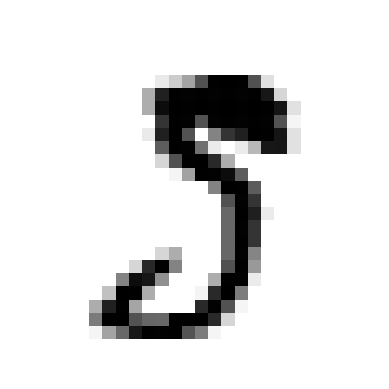

In [30]:
# @SHOW
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

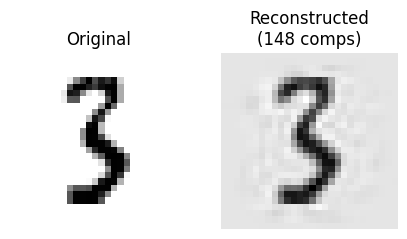

In [31]:
digit_original = X_mnist_test[0]
digit_reduced = pca_95.transform(digit_original.reshape(1, -1))
digit_reconstructed = pca_95.inverse_transform(digit_reduced)

fig, axes = plt.subplots(1, 2, figsize=(5, 3))

axes[0].imshow(digit_original.reshape(28, 28), cmap='binary')
axes[0].set_title("Original")
axes[0].axis("off")
axes[1].imshow(digit_reconstructed.reshape(28, 28), cmap='binary')
axes[1].set_title(f"Reconstructed\n({pca_95.n_components_} comps)")
axes[1].axis("off")

plt.show()


### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [32]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

t0 = time.time()
knn_raw = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_raw.fit(X_mnist_train, y_mnist_train)
y_pred_raw = knn_raw.predict(X_mnist_test)
acc_raw = accuracy_score(y_mnist_test, y_pred_raw)
t_raw = time.time() - t0

print(f"[Raw]   accuracy={acc_raw:.4f} | train+predict time={t_raw:.2f}s | dims={X_mnist_train.shape[1]}")

pca_80 = PCA(n_components=0.80, random_state=42)
t1 = time.time()
Xtr_pca = pca_80.fit_transform(X_mnist_train)
Xte_pca = pca_80.transform(X_mnist_test)

knn_pca = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_pca.fit(Xtr_pca, y_mnist_train)
y_pred_pca = knn_pca.predict(Xte_pca)
acc_pca = accuracy_score(y_mnist_test, y_pred_pca)
t_pca = time.time() - t1

print(f"[PCA80] accuracy={acc_pca:.4f} | train+predict time={t_pca:.2f}s | comps={pca_80.n_components_}")



[Raw]   accuracy=0.9429 | train+predict time=0.56s | dims=784
[PCA80] accuracy=0.9457 | train+predict time=0.94s | comps=42


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

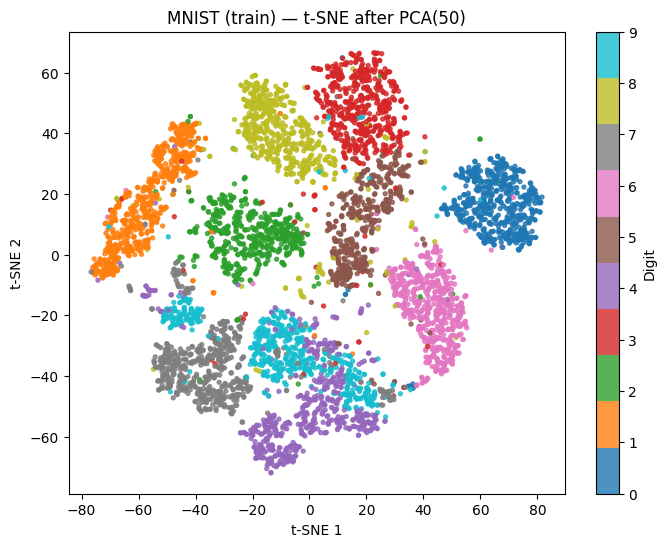

In [33]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

pca50 = PCA(n_components=50, random_state=42)
X50 = pca50.fit_transform(X_mnist_train)

tsne = TSNE(
    n_components=2,
    perplexity=30,
    init="pca",
    learning_rate="auto",
    random_state=42
)
X_tsne_2d = tsne.fit_transform(X50)

plt.figure(figsize=(8,6))
sc = plt.scatter(X_tsne_2d[:,0], X_tsne_2d[:,1],
                 c=y_mnist_train, s=8, alpha=0.8, cmap="tab10")
plt.title("MNIST (train) — t-SNE after PCA(50)")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.colorbar(sc, label="Digit")
plt.show()


2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X_all = np.vstack([X_mnist_train, X_mnist_test])
y_all = np.concatenate([y_mnist_train, y_mnist_test])

pca50_all = PCA(n_components=50, random_state=42)
X_all_50 = pca50_all.fit_transform(X_all)

tsne_all = TSNE(
    n_components=2,
    perplexity=30,
    init="pca",
    learning_rate="auto",
    random_state=42
)
X_all_tsne = tsne_all.fit_transform(X_all_50)

n_tr = len(X_mnist_train)
Xtr_tsne, Xte_tsne = X_all_tsne[:n_tr], X_all_tsne[n_tr:]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtr_tsne, y_mnist_train)
y_pred = knn.predict(Xte_tsne)
acc = accuracy_score(y_mnist_test, y_pred)

print(f"KNN accuracy on t-SNE(2D) features (with leakage caveat): {acc:.4f}")


KNN accuracy on t-SNE(2D) features (with leakage caveat): 0.9457


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

In [35]:
# @SHOW
# You might need to install UMAP.  If so, uncomment the following lines and run them

%pip install numpy==2.0
%pip install umap-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


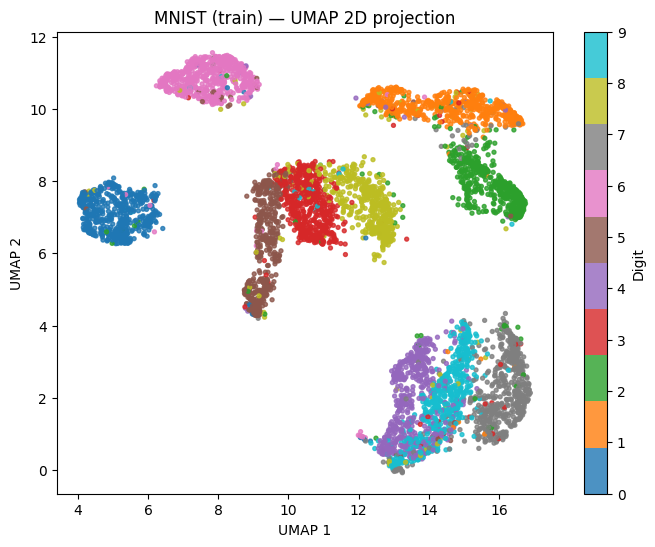

In [36]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_mnist_train)

plt.figure(figsize=(8,6))
sc = plt.scatter(X_umap_2d[:,0], X_umap_2d[:,1],
                 c=y_mnist_train, s=8, cmap="tab10", alpha=0.8)
plt.colorbar(sc, label="Digit")
plt.title("MNIST (train) — UMAP 2D projection")
plt.xlabel("UMAP 1"); plt.ylabel("UMAP 2")
plt.show()

Now, calculate accuracy with KNN.

In [37]:
umap_50 = umap.UMAP(n_components=50, random_state=42)
Xtr_umap = umap_50.fit_transform(X_mnist_train)
Xte_umap = umap_50.transform(X_mnist_test)

knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(Xtr_umap, y_mnist_train)
y_pred_umap = knn.predict(Xte_umap)

acc_umap = accuracy_score(y_mnist_test, y_pred_umap)
print(f"KNN accuracy on UMAP(50D) features: {acc_umap:.4f}")

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


KNN accuracy on UMAP(50D) features: 0.9057


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


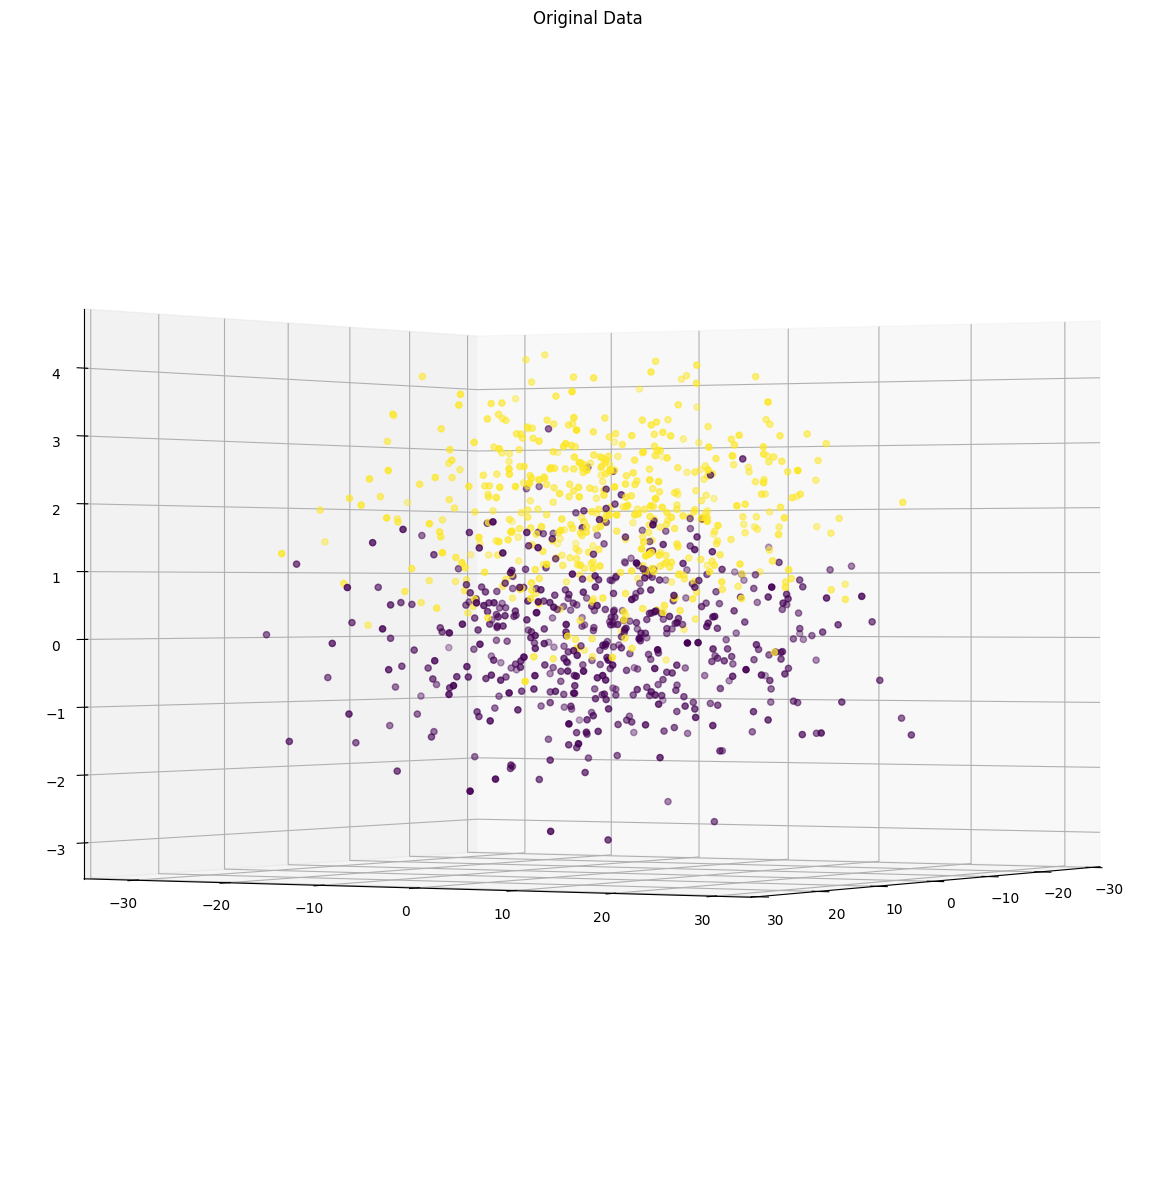

In [38]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [39]:
# @SHOW
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

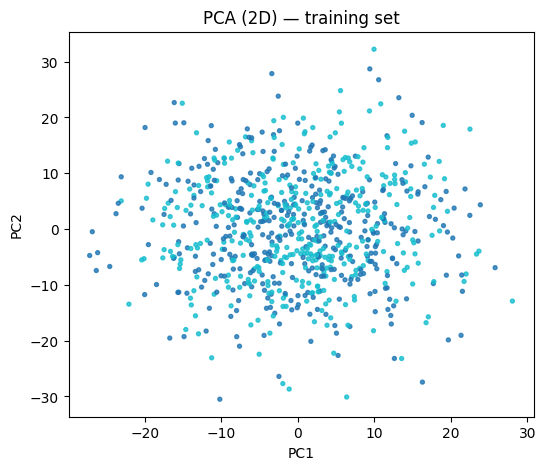

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

dims_pca = [2, 3]
pca_embeddings = {}

for k in dims_pca:
    pca_k = PCA(n_components=k, random_state=42)
    Xtr_k = pca_k.fit_transform(X_train)
    Xte_k = pca_k.transform(X_test)
    pca_embeddings[f"PCA_{k}"] = (Xtr_k, Xte_k)

    if k == 2:
        plt.figure(figsize=(6,5))
        plt.scatter(Xtr_k[:,0], Xtr_k[:,1], c=y_train, s=8, cmap="tab10", alpha=0.8)
        plt.title("PCA (2D) — training set")
        plt.xlabel("PC1"); plt.ylabel("PC2")
        plt.show()




In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for name, (Xtr_k, Xte_k) in pca_embeddings.items():
    knn = KNeighborsClassifier()
    knn.fit(Xtr_k, y_train)
    y_pred = knn.predict(Xte_k)
    print(f"{name}: accuracy = {accuracy_score(y_test, y_pred):.3f}")



PCA_2: accuracy = 0.505
PCA_3: accuracy = 0.725


2. Try with UMAP.

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


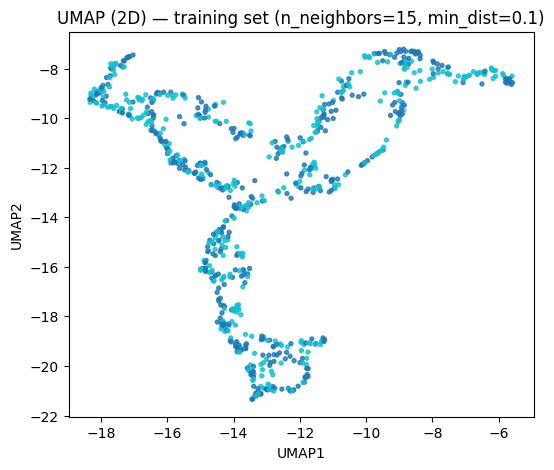

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [42]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

dims_umap = [2, 3, 10, 20]
umap_params = [(15, 0.1)]
umap_embeddings = {}

for k in dims_umap:
    for n_nbrs, min_d in umap_params:
        reducer = umap.UMAP(n_components=k,
                            n_neighbors=n_nbrs,
                            min_dist=min_d,
                            random_state=42)
        Xtr_k = reducer.fit_transform(X_train)
        Xte_k = reducer.transform(X_test)
        key = f"UMAP_{k}_nn{n_nbrs}_md{min_d}"
        umap_embeddings[key] = (Xtr_k, Xte_k)
        if k == 2:
            plt.figure(figsize=(6,5))
            plt.scatter(Xtr_k[:,0], Xtr_k[:,1], c=y_train, s=8, cmap="tab10", alpha=0.8)
            plt.title(f"UMAP (2D) — training set (n_neighbors={n_nbrs}, min_dist={min_d})")
            plt.xlabel("UMAP1"); plt.ylabel("UMAP2")
            plt.show()



In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for name, (Xtr_k, Xte_k) in umap_embeddings.items():
    knn = KNeighborsClassifier()
    knn.fit(Xtr_k, y_train)
    y_pred = knn.predict(Xte_k)
    print(f"{name}: accuracy = {accuracy_score(y_test, y_pred):.3f}")



UMAP_2_nn15_md0.1: accuracy = 0.545
UMAP_3_nn15_md0.1: accuracy = 0.575
UMAP_10_nn15_md0.1: accuracy = 0.590
UMAP_20_nn15_md0.1: accuracy = 0.560


Explain your results in the cell below.  Which works better?  Why?

In [44]:
# The original data gave accuracy around 0.844. With PCA (2D), accuracy usually drops because PCA 
# only captures linear variance directions. With UMAP (2D), accuracy tends to be higher since UMAP 
# preserves local neighborhood structure, which is better suited for KNN. Therefore, UMAP generally
# works better than PCA for KNN on this dataset, as seen in both the accuracy results and the scatter plots.


*Enter your answer in this cell*